# XOR Tutorial with Tensorflow

One of the initial problems with neural networks was exclusive-or, XOR, as studied by Minsky with respect to perceptrons. The XOR-Problem is a classification problem, where you only have four data points with two features. The training set and the test set are exactly the same in this problem. So the interesting question is only if the model is able to find a decision boundary which classifies all four points correctly.

![XOR Decision Boundry](../img/xor-problem.png)


The perceptron is a type of feed-forward network, which means the process of generating an output — known as forward propagation — flows  in one direction from the input layer to the output layer.  There are no connections between units in the input layer.  Instead, all units in the input layer are connected directly to the output unit. In this process the input values are multiplied by their respective weights.

A limitation of this architecture is that it is only capable of separating data points with a single line. This is unfortunate because the XOr inputs are not linearly separable. This is particularly visible if you plot the XOR input values to a graph. As shown in figure 3, there is no way to separate the 1 and 0 predictions with a single classification line.

![XOR Decision Boundry](../img/linsep1.gif)


## Multilayer Perceptrons

The solution to this problem is to expand beyond the single-layer architecture by adding an additional layer of units without any direct access to the outside world, known as a hidden layer.  This kind of architecture is another feed-forward network known as a multilayer perceptron (MLP).

This architecture, while more complex than that of the classic perceptron network, is capable of achieving non-linear separation.  Thus, with the right set of weight values, it can provide the necessary separation to accurately classify the XOr inputs.

![XOR Decision Boundry](../img/linsep2.png)


In [1]:
#!/usr/bin/env python

"""Mini-demo how the one hot encoder works."""

from sklearn.preprocessing import OneHotEncoder
import numpy as np

# The most intuitive way to label a dataset "X"
# (list of features, where X[i] are the features for a datapoint i)
# is to have a flat list "labels" where labels[i] is the label for datapoint i.
labels = [0, 1, 1, 1, 0, 0, 1, 2]

# The OneHotEncoder transforms those labels to something our models can
# work with
enc = OneHotEncoder(categories='auto')


def trans_for_ohe(labels):
    """Transform a flat list of labels to what one hot encoder needs."""
    return np.array(labels).reshape(len(labels), -1)

labels_r = trans_for_ohe(labels)
# The encoder has to know how many classes there are and what their names are.
enc.fit(labels_r)

# Now you can transform
print(enc.transform(trans_for_ohe([1, 0, 2])).toarray().tolist())



[[0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0]]


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use `tf.global_variables_initializer` instead.

Epoch 0
Hypothesis [[0.48712054 0.51287943]
 [0.3380821  0.6619179 ]
 [0.65063184 0.34936816]
 [0.5031724  0.49682766]]
w1=[[-0.79593647  0.9394788 ]
 [ 0.6885476  -0.8942361 ]]
b1=[-0.00733338  0.00893857]
w2=[[-0.7908405   0.93289936]
 [ 0.6927817  -0.8986907 ]]
b2=[ 0.003944   -0.00394399]
cost (ce)=2.8703089


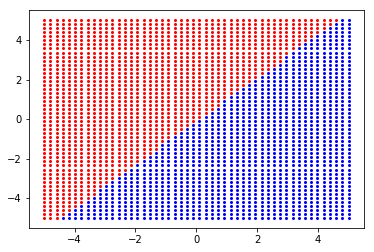


Epoch 10000
Hypothesis [[0.99773693 0.00226305]
 [0.00290442 0.9970956 ]
 [0.00295531 0.99704474]
 [0.9980432  0.00195681]]
w1=[[-6.6269493  7.523028 ]
 [ 6.9120836 -7.39292  ]]
b1=[3.3224514 3.7620401]
w2=[[ 6.634649  -6.492591 ]
 [ 6.4047174 -6.610618 ]]
b2=[-9.650645  9.650649]
cost (ce)=0.010092646


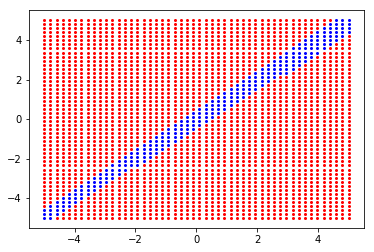


Epoch 20000
Hypothesis [[9.9895477e-01 1.0452041e-03]
 [1.3545546e-03 9.9864548e-01]
 [1.3704252e-03 9.9862957e-01]
 [9.9909222e-01 9.0778538e-04]]
w1=[[-7.0485744  7.846732 ]
 [ 7.330614  -7.6883764]]
b1=[3.5324638 3.8958738]
w2=[[ 7.359483  -7.2174263]
 [ 7.140596  -7.3464923]]
b2=[-10.749447  10.749438]
cost (ce)=0.004680768


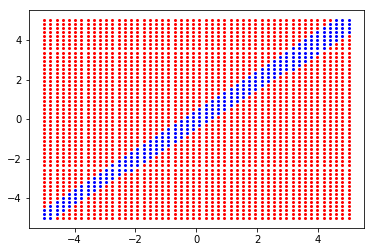

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder


def trans_for_ohe(labels):
    """Transform a flat list of labels to what one hot encoder needs."""
    return np.array(labels).reshape(len(labels), -1)


def analyze_classifier(sess, i, w1, b1, w2, b2, XOR_X, XOR_T):
    """Visualize the classification."""
    print('\nEpoch %i' % i)
    print('Hypothesis %s' % sess.run(hypothesis,
                                     feed_dict={input_: XOR_X,
                                                target: XOR_T}))
    print('w1=%s' % sess.run(w1))
    print('b1=%s' % sess.run(b1))
    print('w2=%s' % sess.run(w2))
    print('b2=%s' % sess.run(b2))
    print('cost (ce)=%s' % sess.run(cross_entropy,
                                    feed_dict={input_: XOR_X,
                                               target: XOR_T}))
    # Visualize classification boundary
    xs = np.linspace(-5, 5)
    ys = np.linspace(-5, 5)
    pred_classes = []
    for x in xs:
        for y in ys:
            pred_class = sess.run(hypothesis,
                                  feed_dict={input_: [[x, y]]})
            pred_classes.append((x, y, pred_class.argmax()))
    xs_p, ys_p = [], []
    xs_n, ys_n = [], []
    for x, y, c in pred_classes:
        if c == 0:
            xs_n.append(x)
            ys_n.append(y)
        else:
            xs_p.append(x)
            ys_p.append(y)
    plt.plot(xs_p, ys_p, 'ro',markersize=2)
    plt.plot(xs_n, ys_n, 'bo',markersize=2)
    plt.show()


# The training data
XOR_X = [[0, 0], [0, 1], [1, 0], [1, 1]]  # Features
XOR_Y = [0, 1, 1, 0]  # Class labels
assert len(XOR_X) == len(XOR_Y)  # sanity check

# Transform labels to targets
enc = OneHotEncoder(categories='auto')
enc.fit(trans_for_ohe(XOR_Y))
XOR_T = enc.transform(trans_for_ohe(XOR_Y)).toarray()

# The network
nb_classes = 2
input_ = tf.placeholder(tf.float32,
                        shape=[None, len(XOR_X[0])],
                        name="input")
target = tf.placeholder(tf.float32,
                        shape=[None, nb_classes],
                        name="output")
nb_hidden_nodes = 2
# enc = tf.one_hot([0, 1], 2)
w1 = tf.Variable(tf.random_uniform([2, nb_hidden_nodes], -1, 1, seed=0),
                 name="Weights1")
w2 = tf.Variable(tf.random_uniform([nb_hidden_nodes, nb_classes], -1, 1,
                                   seed=0),
                 name="Weights2")
b1 = tf.Variable(tf.zeros([nb_hidden_nodes]), name="Biases1")
b2 = tf.Variable(tf.zeros([nb_classes]), name="Biases2")
activation2 = tf.sigmoid(tf.add(tf.matmul(input_, w1), b1))
hypothesis = tf.nn.softmax(tf.add(tf.matmul(activation2, w2), b2))
cross_entropy = -tf.reduce_sum(target * tf.log(hypothesis))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# Start training
init = tf.initialize_all_variables()
#tf.global_variables_initializer 
with tf.Session() as sess:
    sess.run(init)

    for i in range(20001):
        sess.run(train_step, feed_dict={input_: XOR_X, target: XOR_T})

        if i % 10000 == 0:
            analyze_classifier(sess, i, w1, b1, w2, b2, XOR_X, XOR_T)

## References

https://medium.com/@jayeshbahire/the-xor-problem-in-neural-networks-50006411840b

https://towardsdatascience.com/a-concise-history-of-neural-networks-2070655d3fec
